In [ ]:
import tensorflow as tf

In [ ]:
#Loading the dataset
data = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}")

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [ ]:
#Building a simple ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
#Compiling the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Training the model
r = model.fit(x_train, y_train, validation_data = ( x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2992 - accuracy: 0.9143 - val_loss: 0.1482 - val_accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1443 - accuracy: 0.9571 - val_loss: 0.0993 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1071 - accuracy: 0.9674 - val_loss: 0.0908 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0860 - accuracy: 0.9735 - val_loss: 0.0801 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0737 - accuracy: 0.9766 - val_loss: 0.0733 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0642 - accuracy: 0.9792 - val_loss: 0.0737 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0574 - accuracy: 0.9816 - val_loss: 0.0780 - val_accuracy:

In [ ]:
r.history

{'accuracy': [0.9142833352088928,
  0.957099974155426,
  0.9673500061035156,
  0.973466694355011,
  0.9765666723251343,
  0.979200005531311,
  0.9816499948501587,
  0.9827499985694885,
  0.9839333295822144,
  0.9865000247955322],
 'loss': [0.2991674840450287,
  0.14431869983673096,
  0.10709504038095474,
  0.08603260666131973,
  0.07371118664741516,
  0.06415414810180664,
  0.057439111173152924,
  0.0523298978805542,
  0.048906706273555756,
  0.043120648711919785],
 'val_accuracy': [0.9573000073432922,
  0.9696999788284302,
  0.9721999764442444,
  0.9747999906539917,
  0.9785000085830688,
  0.977400004863739,
  0.9746000170707703,
  0.9779999852180481,
  0.9782000184059143,
  0.9787999987602234],
 'val_loss': [0.14819388091564178,
  0.09932413697242737,
  0.09075336158275604,
  0.08008304983377457,
  0.07325441390275955,
  0.07374192029237747,
  0.07800036668777466,
  0.07249394804239273,
  0.0710364505648613,
  0.07835527509450912]}

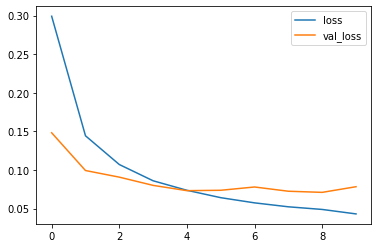

In [ ]:
#Plotting loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

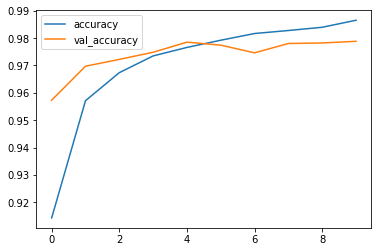

In [ ]:
#Plotting accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
#Evaluation with test set
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9788


[0.07835527509450912, 0.9787999987602234]

Confusion Matrix Non-Normalized
[[ 972    0    0    1    1    1    1    1    3    0]
 [   0 1124    3    2    0    0    2    1    3    0]
 [   3    2 1005    5    1    0    1    6    9    0]
 [   0    0    2  987    0    9    0    6    3    3]
 [   2    0    4    0  961    0    4    4    0    7]
 [   2    0    0    7    1  866    5    4    6    1]
 [   4    2    1    1    4    3  940    0    3    0]
 [   2    2    9    3    1    0    0 1007    1    3]
 [   3    1    2    6    4    1    2    4  948    3]
 [   1    2    0    7   10    3    0    7    1  978]]


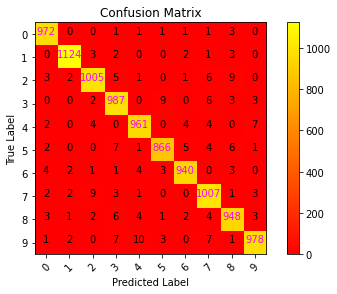

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_CM(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.autumn):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix Non-Normalized')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt), horizontalalignment = 'center', color='magenta' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_CM(cm, list(range(10)))


Text(0.5, 1.0, 'True label: 2 Predicted 1')

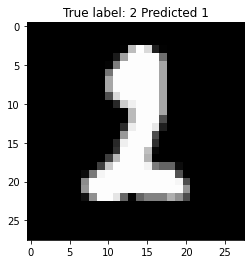

In [ ]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i], p_test[i]))